In [2]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log
import pandas as pd
import numpy as np
import re

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suneherahasib/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import re
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, accuracy_score,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import keras
print('Done')

2023-04-18 20:14:12.619592: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Done


In [4]:
data = pd.read_csv('tweets4f.csv', usecols=['text'])


In [5]:
data

,text
0,Maybe the disasters won't end. But you CAN get...
1,i wish i didn’t have social anxiety bc the thi...
2,𝐼 𝓇𝑒𝒶𝓁𝒾𝓏𝑒 𝓉𝒽𝒶𝓉 #happiness \nhas been 𝐢𝐧𝐬𝐢𝐝𝐞 𝐨𝐟...
3,We understand this feeling! #CFS #Fibromyalg...
4,i am so grateful because things are always wor...
...,...
7622,"Thank You, Jesus, for dying for me. #HolyWeek ..."
7623,#Depression 😭😭😭 .how do you feel when you los...
7624,I have no reason to live. I'm going to hurt s...
7625,True happiness comes from within - it's not ab...


In [6]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

for i in range(len(data)):
  data.at[i,'text'] = remove_urls(data.iloc[i]['text'])
data.tail()





,text
7622,"Thank You, Jesus, for dying for me. #HolyWeek ..."
7623,#Depression 😭😭😭 .how do you feel when you los...
7624,I have no reason to live. I'm going to hurt s...
7625,True happiness comes from within - it's not ab...
7626,I am at that phase of life when i listen to mu...


In [7]:
from sklearn.decomposition import TruncatedSVD

In [8]:
text_data =  data['text'].values.tolist()

# Remove Emails
text_data = [re.sub('\S*@\S*\s?', '', sent) for sent in text_data ]

# Remove new line characters
text_data= [re.sub('\s+', ' ', sent) for sent in text_data]

# Remove distracting single quotes
text_data = [re.sub("\'", "", sent) for sent in text_data]

text_data = [re.sub(r'[^\w\s]+', '', sent) for sent in text_data]


text_data = [[word for word in doc.lower().split()] for doc in data['text']]


print(text_data[:1])

[['maybe', 'the', 'disasters', "won't", 'end.', 'but', 'you', 'can', 'get', 'through', 'them', 'for', 'that', 'little', 'light', 'of', 'hope', "that's", 'still', 'there', 'in', 'you.', 'i', 'know', 'it', 'is.', 'i', 'promise', 'it', 'is.', 'it', 'might', 'be', 'small.', 'maybe', 'even', 'hidden.', 'but', 'i', 'promise', 'you,', "it's", 'there.', '#depression', '#anxiety', '#mentalillness', '#mentalhealthawareness']]


In [9]:
text_data

[['maybe',
  'the',
  'disasters',
  "won't",
  'end.',
  'but',
  'you',
  'can',
  'get',
  'through',
  'them',
  'for',
  'that',
  'little',
  'light',
  'of',
  'hope',
  "that's",
  'still',
  'there',
  'in',
  'you.',
  'i',
  'know',
  'it',
  'is.',
  'i',
  'promise',
  'it',
  'is.',
  'it',
  'might',
  'be',
  'small.',
  'maybe',
  'even',
  'hidden.',
  'but',
  'i',
  'promise',
  'you,',
  "it's",
  'there.',
  '#depression',
  '#anxiety',
  '#mentalillness',
  '#mentalhealthawareness'],
 ['i',
  'wish',
  'i',
  'didn’t',
  'have',
  'social',
  'anxiety',
  'bc',
  'the',
  'things',
  'i',
  'would',
  'do',
  'to',
  'become',
  'an',
  'actor'],
 ['𝐼',
  '𝓇𝑒𝒶𝓁𝒾𝓏𝑒',
  '𝓉𝒽𝒶𝓉',
  '#happiness',
  'has',
  'been',
  '𝐢𝐧𝐬𝐢𝐝𝐞',
  '𝐨𝐟',
  '𝐦𝐞',
  'all',
  'this',
  'time,',
  'i',
  'just',
  '𝐡𝐚𝐝',
  '𝐭𝐨',
  '𝐜𝐡𝐚𝐧𝐠𝐞',
  'the',
  'way',
  'i',
  'think.',
  '#mindsetmatters'],
 ['we',
  'understand',
  'this',
  'feeling!',
  '#cfs',
  '#fibromyalgia',
  '#anxiety',
  '

In [10]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(text_data))

print(data_words[:1])

[['maybe', 'the', 'disasters', 'won', 'end', 'but', 'you', 'can', 'get', 'through', 'them', 'for', 'that', 'little', 'light', 'of', 'hope', 'that', 'still', 'there', 'in', 'you', 'know', 'it', 'is', 'promise', 'it', 'is', 'it', 'might', 'be', 'small', 'maybe', 'even', 'hidden', 'but', 'promise', 'you', 'it', 'there', 'depression', 'anxiety', 'mentalillness']]


In [11]:
data_words = list(sent_to_words(text_data))

In [12]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

['maybe', 'the', 'disasters', 'won', 'end', 'but', 'you', 'can', 'get', 'through', 'them', 'for', 'that', 'little', 'light', 'of', 'hope', 'that', 'still', 'there', 'in', 'you', 'know', 'it', 'is', 'promise', 'it', 'is', 'it', 'might', 'be', 'small', 'maybe', 'even', 'hidden', 'but', 'promise', 'you', 'it', 'there', 'depression', 'anxiety', 'mentalillness']


In [13]:
stop_words = set(stopwords.words("english"))


def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [14]:
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[['maybe', 'disaster', 'end', 'get', 'little', 'light', 'hope', 'still', 'know', 'promise', 'small', 'maybe', 'even', 'hidden', 'promise', 'depression', 'anxiety', 'mentalillness']]


In [15]:
dataset = []
for i in range(len(data_lemmatized)):
    dataset.append(" ".join(data_lemmatized[i]))
dataset = pd.Series(dataset)

In [16]:
no_features = 7000

# NMF is able to use tf-idf
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

# LDA can only use raw term counts for LDA because it is a probabilistic graphical model
tf_vectorizer = CountVectorizer(min_df=0.05,max_features=no_features)
tf = tf_vectorizer.fit_transform(dataset)
tf_feature_names = tf_vectorizer.get_feature_names()

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
no_topics = 2

In [19]:
from gensim.matutils import Sparse2Corpus
from gensim.models import HdpModel

In [20]:
no_topics = 2

# Run NMF
nmf = NMF(n_components=no_topics, random_state=1, alpha=.1, l1_ratio=.5,max_iter=10000).fit(tfidf)

# Run LDA
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=10, learning_method='online', learning_offset=50.,random_state=0).fit(tf)

In [21]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 25
print('NMF')
display_topics(nmf, tfidf_feature_names, no_top_words)
print('LDA')
display_topics(lda, tf_feature_names, no_top_words)


NMF
Topic 0:
anxiety, depression, get, feel, go, give, give anxiety, anxiety depression, social, help, know, social anxiety, stress, take, depression anxiety, think, people, need, attack, bad, mentalhealth, really, work, anxiety attack, time
Topic 1:
happiness, grateful, thankful, life, love, happy, day, make, good, thank, thing, bless, time, gratitude, today, joy, get, people, feel, live, let, success, positivity, bring, go
LDA
Topic 0:
anxiety, depression, get, feel, go, help, know, people, mentalhealth, think, take, time, make, good, day, today, love, thing, life, happy, grateful, thankful, happiness
Topic 1:
happiness, life, day, thankful, grateful, love, make, good, thing, happy, today, time, people, take, go, think, feel, know, get, help, anxiety, depression, mentalhealth


In [22]:
no_features = 7000

# Use TF-IDF for LSA
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=no_features)
tfidf = tfidf_vectorizer.fit_transform(dataset)

# Run LSA
lsa = TruncatedSVD(n_components=no_topics, algorithm='randomized', n_iter=100, random_state=1)
lsa.fit(tfidf)

# Print the top words for each topic
no_top_words = 25
print('LSA')
display_topics(lsa, tfidf_feature_names, no_top_words)

LSA
Topic 0:
anxiety, depression, happiness, get, feel, grateful, thankful, go, life, day, make, time, give, thing, love, people, know, good, take, help, today, think, happy, amp, work
Topic 1:
anxiety, give anxiety, social, social anxiety, anxiety depression, attack, anxiety attack, depression anxiety, give, stress, get anxiety, stress anxiety, separation anxiety, separation, anxiety get, affirmation anxiety, induce, anxiety anxiety, anxiety feel, help anxiety, go anxiety, hate, anxiety induce, disorder, anxiety really


In [23]:
corpus = Sparse2Corpus(tf.T)
hdp_model = HdpModel(corpus=corpus, id2word=dict((i, s) for i, s in enumerate(tf_feature_names)))

# print the top 10 topics and their top 10 words
topics = hdp_model.show_topics(num_topics=2, num_words=10, formatted=False)
#This should convert the matrix to a valid gensim corpus object and enable you to fit the HDP model to the data.

In [23]:
df = pd.read_csv('tweets4f.csv')

# Function to clean the text of each tweet
def clean_tweet_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Clean the text of each tweet in the dataframe
df['text'] = df['text'].apply(clean_tweet_text)

# Save the cleaned dataframe to a new CSV file
df.to_csv('tweets5f.csv', index=False)
#This code will remove URLs, mentions, hashtags, non-alphabetic characters, and extra spaces from the text of each tweet in the text column of the tweets4f.csv file. The cleaned dataframe will then be saved to a new CSV file named cleaned_tweets4f.csv which can be used for further analysis.







In [24]:
lda_output = lda.transform(tf)
# column names
topicnames = ['Topic' + str(i) for i in range(lda.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset2 = pd.read_csv("tweets5f.csv")
df_document_topics.reset_index(inplace=True,drop=True)
dataset2['label'] = df_document_topics['dominant_topic']

In [25]:
nmf_output = nmf.transform(tfidf)
# column names
topicnames = ['Topic' + str(i) for i in range(nmf.n_components)]
# index names
docnames = ['Doc' + str(i) for i in range(len(dataset))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(nmf_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic
dataset1 = pd.read_csv('tweets5f.csv')
df_document_topics.reset_index(inplace=True,drop=True)
dataset1['label'] = df_document_topics['dominant_topic']

In [34]:
for i in range(20):
    print(dataset1[dataset1['label']==0].iloc[i][1])
    print('\n')

has been all this time i just the way i think


i am so grateful because things are always working out for me


god is good thank you to everyone who said prayers for naiyah her bone density scans came back normal this morning still have to do genetic testing but its a step in a better direction and makes us hopeful one test down and one to go


gratitude can transform your entire perspective on life start each day with a grateful heart


for real though if someone got me this either soon or on my birthday may i would be forever grateful


i believe in god only i spell it nature frank lloyd wright


lol this happened like a year ago i think it was so random but i am very grateful


this week is already starting off on a high note and its only going to get better


considering sneasy to find very effective otherwise perhaps bleach and vinegar i think it is theres so many every day household items that one can choosejust a matter of how and how quicklyeffectively


happiness is the great

In [29]:
tweets = np.array(text_data)
labels = np.array(dataset1['label'])
print(len(tweets),len(labels))

7627 7627


In [30]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras import regularizers
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)




[[   0    0    0 ...   15  306  111]
 [   0    0    0 ...  455   62 6605]
 [   0    0    0 ...    4 2607 5637]
 ...
 [   0    0    0 ...  108   29   12]
 [   0    0    0 ...  154   20  196]
 [   0    0    0 ... 5580 1153   12]]


In [31]:
for i in range(20):
    dataset1[dataset1['label']==0].iloc[i][1] = dataset1[dataset1['label']==0].iloc[i][1].lower()

In [32]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, test_size=0.2, random_state=42)
print(X_train, X_train.shape, y_train.shape)
print(X_test, X_test.shape, y_test.shape)
print (len(X_train),len(X_test),len(y_train),len(y_test))

[[   0    0    0 ... 2469 2545 1367]
 [   0    0    0 ...  250   96   55]
 [   0    0    0 ...  427   15  540]
 ...
 [   0    0    0 ...   16    9   21]
 [   0    0    0 ...   26   23  130]
 [   0    0    0 ...  117   11   15]] (6101, 100) (6101,)
[[   0    0    0 ...   16   70 3124]
 [   0    0    0 ... 1969   12 1748]
 [   0    0    0 ... 3262 1397   32]
 ...
 [   0    0    0 ... 2420  111 8623]
 [   0    0    0 ... 1814  111   12]
 [   0    0    0 ... 3995    2  996]] (1526, 100) (1526,)
6101 1526 6101 1526


In [33]:
print('Shape of X_train:', X_train.shape)
print('Shape of X_test:', X_test.shape)

Shape of X_train: (6101, 100)
Shape of X_test: (1526, 100)


In [38]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 40))
model1.add(layers.LSTM(40,dropout=0.5))
model1.add(layers.Dense(1,activation='sigmoid'))

model1.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=7,validation_data=(X_test, y_test))


Epoch 1/7


2023-04-18 20:19:35.170797: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 20:19:35.171958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 20:19:35.174662: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

191/191 [==============================] - ETA: 0s - loss: 0.4219 - accuracy: 0.8148

2023-04-18 20:19:41.651726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 20:19:41.652730: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 20:19:41.654472: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

191/191 [==============================] - 7s 27ms/step - loss: 0.4219 - accuracy: 0.8148 - val_loss: 0.2086 - val_accuracy: 0.9279
Epoch 2/7
191/191 [==============================] - 5s 24ms/step - loss: 0.1486 - accuracy: 0.9487 - val_loss: 0.1358 - val_accuracy: 0.9489
Epoch 3/7
191/191 [==============================] - 5s 25ms/step - loss: 0.0852 - accuracy: 0.9708 - val_loss: 0.1120 - val_accuracy: 0.9574
Epoch 4/7
191/191 [==============================] - 5s 24ms/step - loss: 0.0663 - accuracy: 0.9767 - val_loss: 0.0904 - val_accuracy: 0.9672
Epoch 5/7
191/191 [==============================] - 5s 24ms/step - loss: 0.0492 - accuracy: 0.9831 - val_loss: 0.0850 - val_accuracy: 0.9718
Epoch 6/7
191/191 [==============================] - 5s 24ms/step - loss: 0.0411 - accuracy: 0.9869 - val_loss: 0.0792 - val_accuracy: 0.9771
Epoch 7/7
191/191 [==============================] - 4s 24ms/step - loss: 0.0318 - accuracy: 0.9902 - val_loss: 0.0748 - val_accuracy: 0.9744


In [40]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40))
model3.add(layers.Bidirectional(layers.LSTM(40,dropout=0.5)))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',loss='binary_crossentropy', metrics=['accuracy'])

history = model3.fit(X_train, y_train, epochs=8,validation_data=(X_test, y_test))

2023-04-18 20:20:52.849241: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 20:20:52.850248: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 20:20:52.851843: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/8


2023-04-18 20:20:53.297164: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 20:20:53.299906: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 20:20:53.301754: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

191/191 [==============================] - ETA: 0s - loss: 0.4586 - accuracy: 0.7927

2023-04-18 20:21:02.407853: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 20:21:02.409748: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 20:21:02.411465: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

191/191 [==============================] - 10s 35ms/step - loss: 0.4586 - accuracy: 0.7927 - val_loss: 0.2525 - val_accuracy: 0.9266
Epoch 2/8
191/191 [==============================] - 6s 31ms/step - loss: 0.1671 - accuracy: 0.9471 - val_loss: 0.1458 - val_accuracy: 0.9417
Epoch 3/8
191/191 [==============================] - 6s 32ms/step - loss: 0.0955 - accuracy: 0.9687 - val_loss: 1.2145 - val_accuracy: 0.5780
Epoch 4/8
191/191 [==============================] - 6s 32ms/step - loss: 0.0747 - accuracy: 0.9759 - val_loss: 0.0896 - val_accuracy: 0.9679
Epoch 5/8
191/191 [==============================] - 6s 33ms/step - loss: 0.0511 - accuracy: 0.9839 - val_loss: 0.0838 - val_accuracy: 0.9705
Epoch 6/8
191/191 [==============================] - 6s 32ms/step - loss: 0.0435 - accuracy: 0.9857 - val_loss: 0.0774 - val_accuracy: 0.9738
Epoch 7/8
191/191 [==============================] - 6s 33ms/step - loss: 0.0391 - accuracy: 0.9884 - val_loss: 0.0697 - val_accuracy: 0.9797
Epoch 8/8
191/1

In [47]:
test = np.array(['I am horny.'])
test_sequence = tokenizer.texts_to_sequences(test)
test_sequence = pad_sequences(test_sequence, maxlen=max_len)
test_prediction = model3.predict(test_sequence)
if np.around(test_prediction, decimals=0)[0][0] == 0.0:
    print('The model predicted depressive/anxious language')
else:
    print("The model predicted other type of language")

1/1 [==============================] - 0s 27ms/step
The model predicted other type of language


In [43]:
test_loss, test_acc = model3.evaluate(X_test,  y_test, verbose=2)
print('Model accuracy: ',test_acc)

48/48 - 0s - loss: 0.0716 - accuracy: 0.9797 - 327ms/epoch - 7ms/step
Model accuracy:  0.9796854257583618


Topic #0:


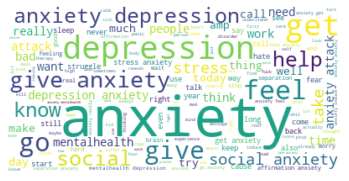

Topic #1:


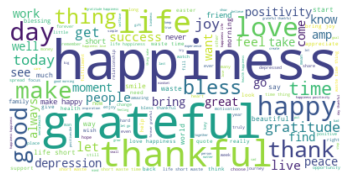

Topic #0:


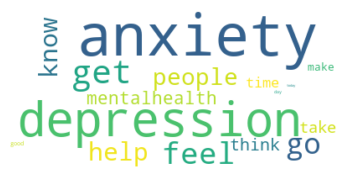

Topic #1:


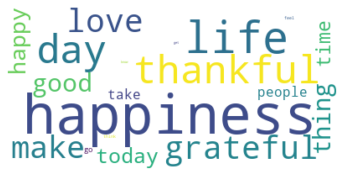

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Display the generated image:
def show_wordcloud(feature_names, weights):
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(dict(zip(feature_names, weights)))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# For NMF
for topic_idx, topic in enumerate(nmf.components_):
    print("Topic #%d:" % topic_idx)
    feature_names = tfidf_feature_names
    weights = topic
    show_wordcloud(feature_names, weights)

# For LDA
for topic_idx, topic in enumerate(lda.components_):
    print("Topic #%d:" % topic_idx)
    feature_names = tf_feature_names
    weights = topic
    show_wordcloud(feature_names, weights)
